<center><h1>HW2</h1></center>
<br>
<br>

Name: Vivek Lakhani
<br>
Github Username: vivek-lakhani-1
<br>
USC ID: 8836256233

## 1. Combined Cycle Power Plant Data Set

### (a) Download Data

Package imports

In [1]:
# !pip install matplotlib numpy pandas seaborn scipy scikit-learn tabulate statsmodels
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import math
from scipy.io import arff
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances
from tabulate import tabulate
import statsmodels.api as sm
warnings.filterwarnings("ignore")
from itertools import combinations

Get the Cycle Power Plant Data Set

In [2]:
# !mkdir -p ..data
# !curl -o CCPP.zip https://archive.ics.uci.edu/static/public/294/combined+cycle+power+plant.zip
# !unzip CCPP.zip -d ..data

### (b) Exploring the data

#### i. rows and columns

In [3]:
df_data = pd.read_excel(r'../data/CCPP/Folds5x2_pp.ods',engine="odf")


# Show first few rows
print("\nFirst 5 Rows:")
print(df_data.head())

# Get number of rows and columns

num_rows, num_columns = df_data.shape
print(f"\nTotal Rows: {num_rows}")
# Rows represents 9568 data points collected from a Combined Cycle Power Plant over 6 years.
print(f"Total Columns: {num_columns}")

# Display column names
print("\nColumn Names:")
columns_name = df_data.columns.tolist()
print(columns_name)

column_details = [
    ["T", "Temperature", "Average ambient temperature (°C) per hour"],
    ["AP", "Ambient Pressure", "Average atmospheric pressure (millibars) per hour"],
    ["RH", "Relative Humidity", "Average relative humidity (%) per hour"],
    ["V", "Exhaust Vacuum", "Average vacuum pressure (cm Hg) per hour"],
    ["EP", "Energy Output", "Net hourly electrical energy output (MW)"]
]

# Print table header
print("\n{:<10} | {:<20} | {:<50}".format("Column", "Full Form", "Description"))
print("-" * 90)

# Print column details in a structured format
for column in column_details:
    print("{:<10} | {:<20} | {:<50}".format(column[0], column[1], column[2]))


First 5 Rows:
      AT      V       AP     RH      PE
0  14.96  41.76  1024.07  73.17  463.26
1  25.18  62.96  1020.04  59.08  444.37
2   5.11  39.40  1012.16  92.14  488.56
3  20.86  57.32  1010.24  76.64  446.48
4  10.82  37.50  1009.23  96.62  473.90

Total Rows: 9568
Total Columns: 5

Column Names:
['AT', 'V', 'AP', 'RH', 'PE']

Column     | Full Form            | Description                                       
------------------------------------------------------------------------------------------
T          | Temperature          | Average ambient temperature (°C) per hour         
AP         | Ambient Pressure     | Average atmospheric pressure (millibars) per hour 
RH         | Relative Humidity    | Average relative humidity (%) per hour            
V          | Exhaust Vacuum       | Average vacuum pressure (cm Hg) per hour          
EP         | Energy Output        | Net hourly electrical energy output (MW)          


#### ii. pairwise scatterplots of all the varianbles

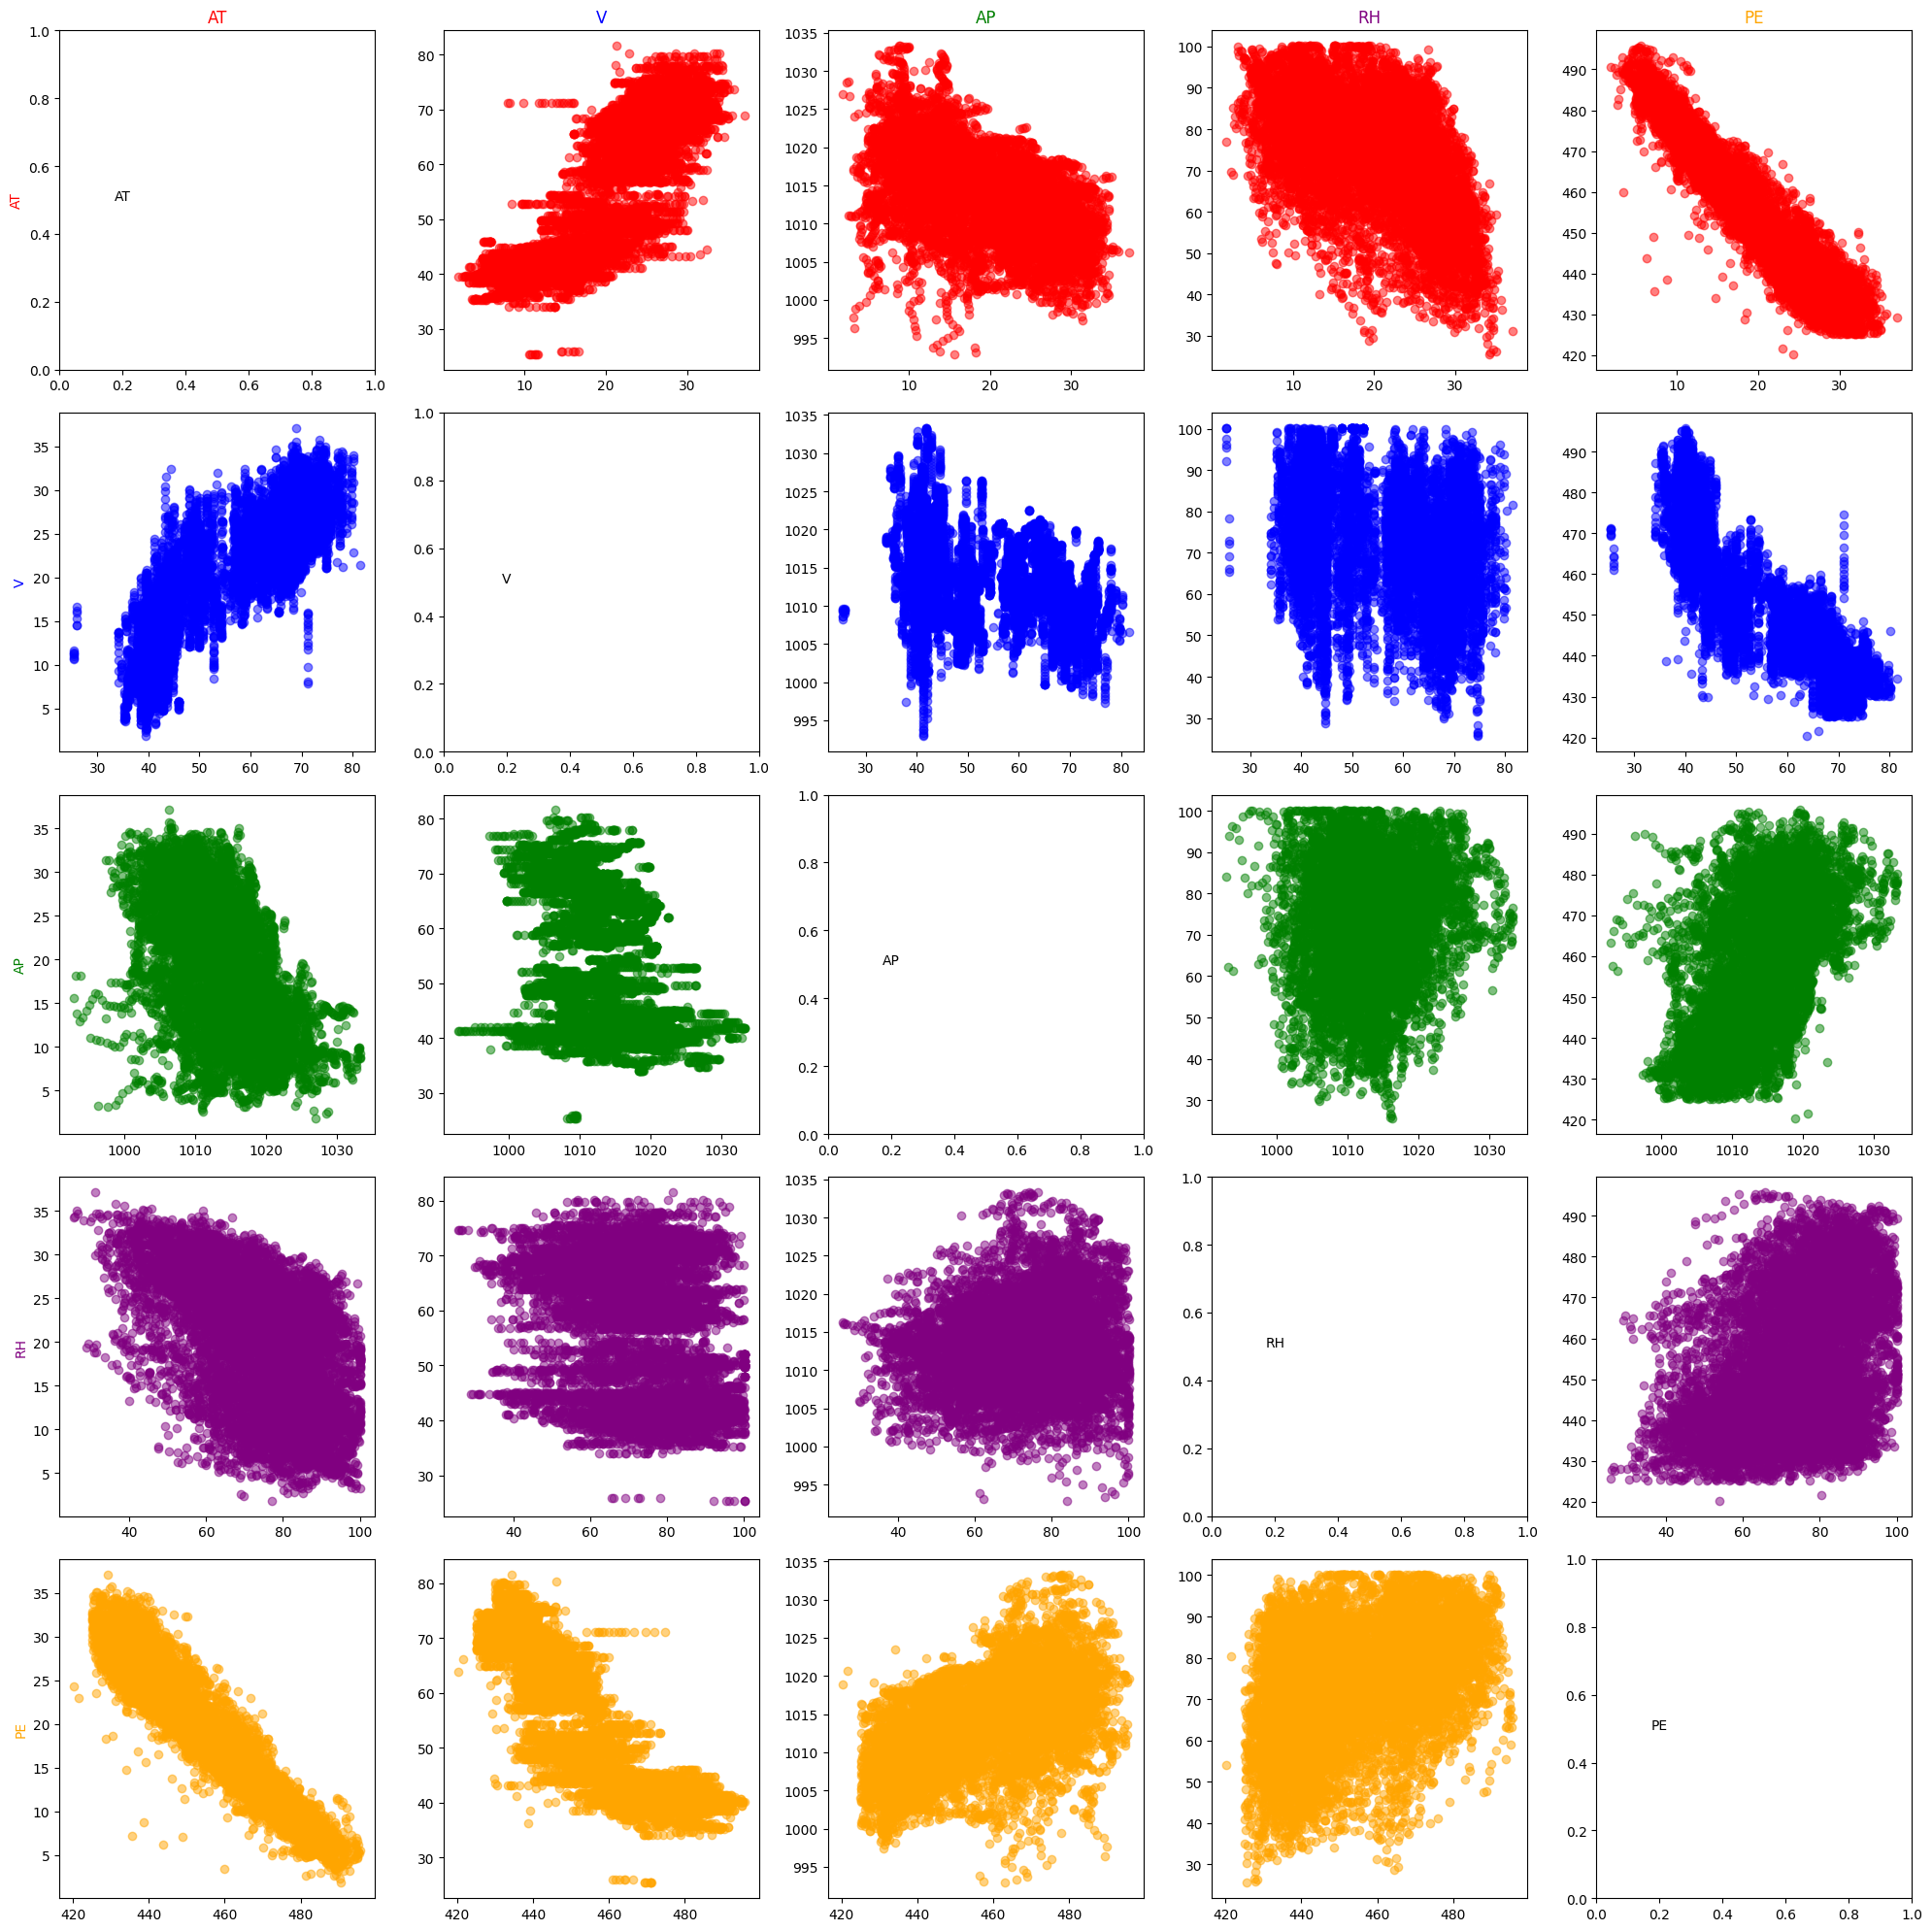

In [4]:
data_array = df_data.to_numpy()
feature_names = df_data.columns.tolist()

fig, axes = plt.subplots(5, 5, figsize=(20, 20))

colors = ['red', 'blue', 'green', 'purple', 'orange']

for row in range(5):
    for col in range(5):
        if row != col:
            axes[row, col].scatter(data_array[:, row], data_array[:, col], alpha=0.5, color=colors[row % len(colors)])
        else:
            axes[row, col].text(0.2, 0.5, s=feature_names[row], fontsize=10, ha="center", color='black')

        if col == 0:
            axes[row, col].set_ylabel(feature_names[row], color=colors[row % len(colors)])
        if row == 0:
            axes[row, col].set_title(feature_names[col], color=colors[col % len(colors)])

plt.tight_layout()
plt.show()

Findings

1. Higher temperature lowers energy output.
2. Higher pressure increases energy output.
3. Humidity has a slight negative effect.
4. Higher vacuum pressure reduces energy output.
5. Temperature and vacuum pressure are strongly related.
   

#### iii. mean, the median, range, first and third quartiles, and interquartile ranges

In [5]:
summary_stats = pd.DataFrame({
    "Mean": df_data.mean(),
    "Median": df_data.median(),
    "Min": df_data.min(),
    "Max": df_data.max(),
    "Range": df_data.max() - df_data.min(),
    "Q1 (First Quartile)": df_data.quantile(0.25),
    "Q3 (Third Quartile)": df_data.quantile(0.75),
    "IQR (Interquartile Range)": df_data.quantile(0.75) - df_data.quantile(0.25)
})


print("\nSummary Statistics of Dataset:\n")
print(summary_stats.to_markdown())


Summary Statistics of Dataset:

|    |      Mean |   Median |    Min |     Max |   Range |   Q1 (First Quartile) |   Q3 (Third Quartile) |   IQR (Interquartile Range) |
|:---|----------:|---------:|-------:|--------:|--------:|----------------------:|----------------------:|----------------------------:|
| AT |   19.6512 |   20.345 |   1.81 |   37.11 |   35.3  |               13.51   |                 25.72 |                     12.21   |
| V  |   54.3058 |   52.08  |  25.36 |   81.56 |   56.2  |               41.74   |                 66.54 |                     24.8    |
| AP | 1013.26   | 1012.94  | 992.89 | 1033.3  |   40.41 |             1009.1    |               1017.26 |                      8.16   |
| RH |   73.309  |   74.975 |  25.56 |  100.16 |   74.6  |               63.3275 |                 84.83 |                     21.5025 |
| PE |  454.365  |  451.55  | 420.26 |  495.76 |   75.5  |              439.75   |                468.43 |                     28.68   |


### (c) Simple Linear Regression

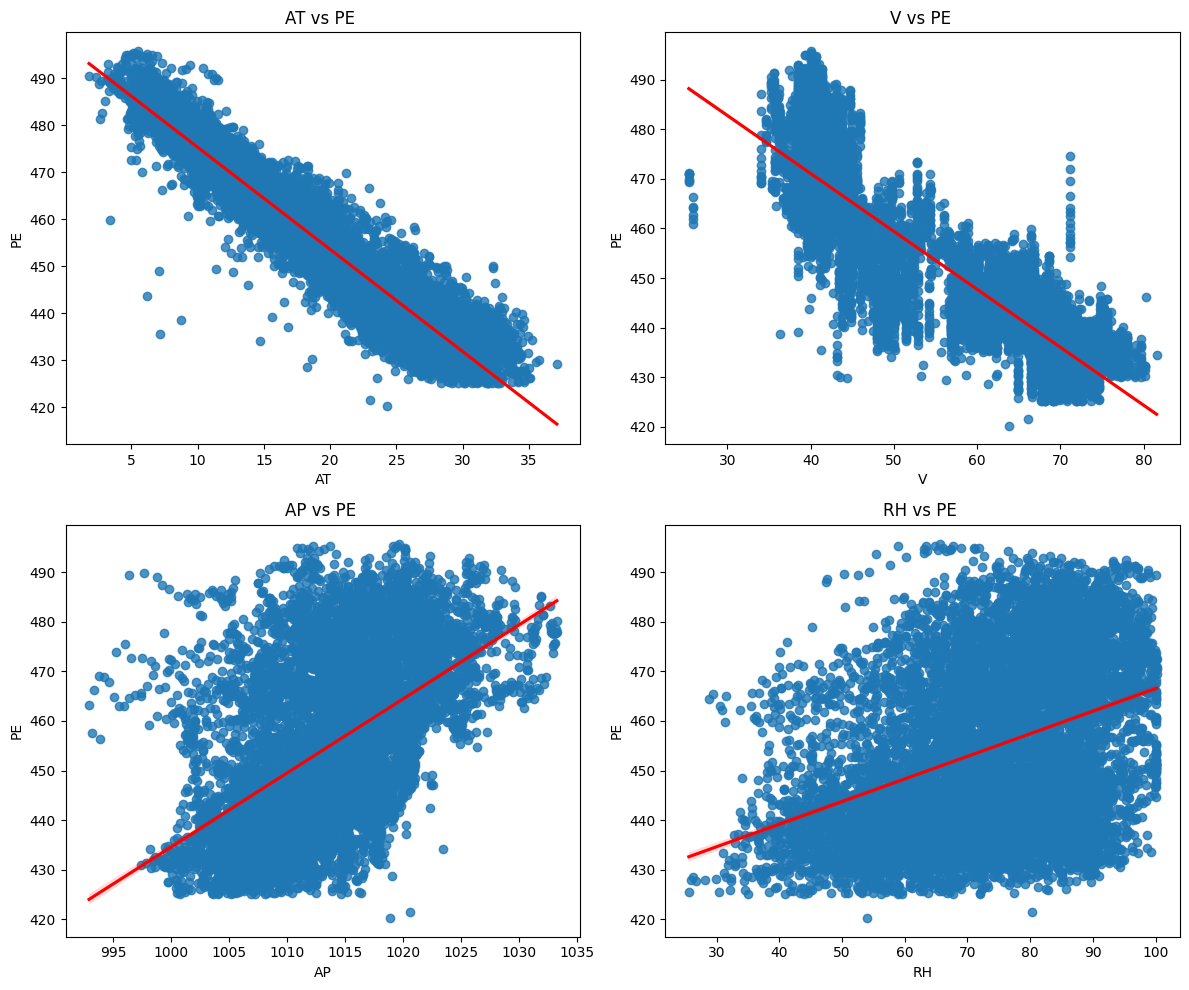

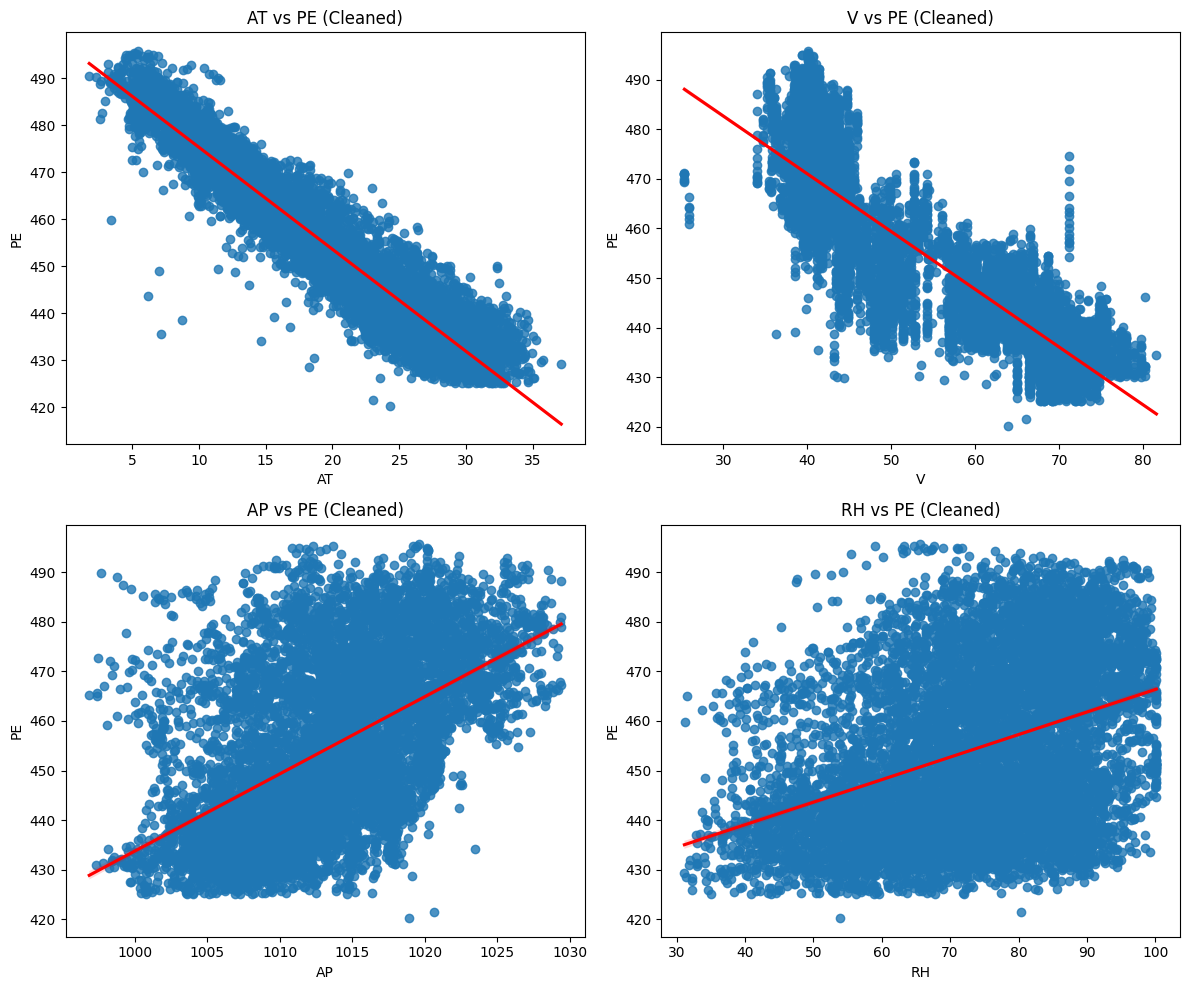

  Predictor  R² Before  R² After  P-Value Before  P-Value After
0        AT   0.898948  0.897835             0.0            0.0
1         V   0.756518  0.754784             0.0            0.0
2        AP   0.268769  0.271993             0.0            0.0
3        RH   0.151939  0.150938             0.0            0.0


In [6]:

predictors, response = df_data.columns[:-1], df_data.columns[-1]

def perform_regression(data, title_suffix=""):
    results = {}
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    axes = axes.flatten()
    
    for i, predictor in enumerate(predictors):
        X, y = data[predictor], data[response]
        X = sm.add_constant(X)
        model = sm.OLS(y, X).fit()
        results[predictor] = model

        sns.regplot(x=data[predictor], y=data[response], ax=axes[i], line_kws={"color": "red"})
        axes[i].set_title(f"{predictor} vs {response} {title_suffix}")
        axes[i].set_xlabel(predictor)
        axes[i].set_ylabel(response)
    
    plt.tight_layout()
    plt.show()
    return results

regression_results = perform_regression(df_data)


cleaned_data = df_data.copy()
for predictor in predictors:
    Q1, Q3 = df_data[predictor].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    cleaned_data = cleaned_data[(cleaned_data[predictor] >= Q1 - 1.5 * IQR) & (cleaned_data[predictor] <= Q3 + 1.5 * IQR)]


regression_results_cleaned = perform_regression(cleaned_data, "(Cleaned)")


comparison_table = pd.DataFrame({
    "Predictor": predictors,
    "R² Before": [regression_results[p].rsquared for p in predictors],
    "R² After": [regression_results_cleaned[p].rsquared for p in predictors],
    "P-Value Before": [regression_results[p].pvalues[1] for p in predictors],
    "P-Value After": [regression_results_cleaned[p].pvalues[1] for p in predictors]
})

print(comparison_table.to_string())


AT and V stand out as the strongest predictors. All four variables have extremely small p-values for their coefficients, confirming the rejection of the null hypothesis. While the Temperature graph shows a few outliers, they have little impact on the overall results.

### (d) Multiple Regression

In [7]:

X = df_data.iloc[:, :-1]
y = df_data.iloc[:, -1]

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

print(model.summary())

significant_predictors = model.pvalues[model.pvalues < 0.05].index.tolist()
print("Significant Predictors (Reject H0):", significant_predictors)

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Fri, 14 Feb 2025   Prob (F-statistic):               0.00
Time:                        15:53:51   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.6093      9.749     46.634      0.0

for all of the variables we can reject the null hypothesis.

### (e) 1c Compare to 1d

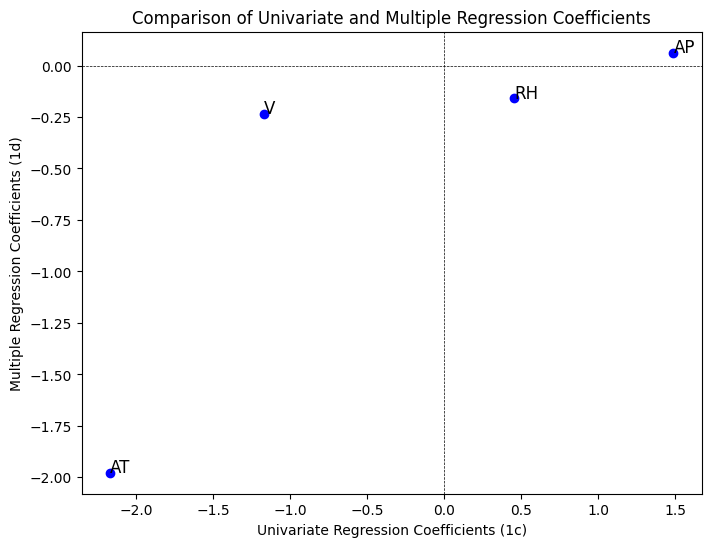

In [8]:
simple_coefficients = {predictor: regression_results[predictor].params[1] for predictor in predictors}
multiple_coefficients = {predictor: model.params[predictor] for predictor in predictors}

plt.figure(figsize=(8, 6))
plt.scatter(list(simple_coefficients.values()), list(multiple_coefficients.values()), color='blue')

for predictor in predictors:
    plt.text(simple_coefficients[predictor], multiple_coefficients[predictor], predictor, fontsize=12)

plt.xlabel("Univariate Regression Coefficients (1c)")
plt.ylabel("Multiple Regression Coefficients (1d)")
plt.title("Comparison of Univariate and Multiple Regression Coefficients")
plt.axhline(0, color='black', linewidth=0.5, linestyle="--")
plt.axvline(0, color='black', linewidth=0.5, linestyle="--")

plt.show()

The coefficient for AT remains nearly unchanged, while the other three variables have increased significantly.

### (f) Nonlinear Association

In [9]:
import statsmodels.api as sm
import pandas as pd

# Fit nonlinear regression models for each predictor
nonlinear_regression_results = {}

for predictor in predictors:
    X = df_data[predictor]
    y = df_data[response]
    
    # Create X, X^2, and X^3
    X_poly = pd.DataFrame({
        'const': 1,
        predictor: X,
        f'{predictor}^2': X**2,
        f'{predictor}^3': X**3
    })
    
    model = sm.OLS(y, X_poly).fit()
    nonlinear_regression_results[predictor] = model.summary()

# Print nonlinear regression results for each predictor
for predictor, result in nonlinear_regression_results.items():
    print("---"*44)
    print("---"*44)
    print(f"Nonlinear regression results for {predictor}:")
    print(result)
    print("---"*44)
    print("---"*44)


------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------
Nonlinear regression results for AT:
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Fri, 14 Feb 2025   Prob (F-statistic):               0.00
Time:                        15:53:51   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                            

The feature RH exhibits nonlinearity. Although the p-values are low, the coefficient values remain quite small.

### (g) Interactions of Predictors

In [10]:

interaction_terms = {f"{p1}*{p2}": df_data[p1] * df_data[p2] for p1, p2 in combinations(predictors, 2)}

X_interaction = df_data[predictors].copy()
for name, values in interaction_terms.items():
    X_interaction[name] = values

X_interaction = sm.add_constant(X_interaction)
y = df_data[response]

interaction_model = sm.OLS(y, X_interaction).fit()

significant_interactions = interaction_model.pvalues[interaction_model.pvalues < 0.05].index.tolist()

print(interaction_model.summary())
print("Significant Interaction Terms:", significant_interactions)


                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Fri, 14 Feb 2025   Prob (F-statistic):               0.00
Time:                        15:53:51   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        685.7825     78.640      8.721      0.0

It is important to note that some of the original linear terms are now insignificant, with only V remaining statistically significant

### (h) Improvement

In [11]:


train_data, test_data = train_test_split(df_data, test_size=0.3, random_state=42)

X_train, y_train = train_data.iloc[:, :-1], train_data.iloc[:, -1]
X_test, y_test = test_data.iloc[:, :-1], test_data.iloc[:, -1]

X_train_quad = X_train.copy()
X_test_quad = X_test.copy()
for predictor in predictors:
    X_train_quad[f"{predictor}^2"] = X_train[predictor] ** 2
    X_test_quad[f"{predictor}^2"] = X_test[predictor] ** 2

X_train_quad = sm.add_constant(X_train_quad)
X_test_quad = sm.add_constant(X_test_quad)
quad_model = sm.OLS(y_train, X_train_quad).fit()

significant_vars = quad_model.pvalues[quad_model.pvalues < 0.05].index.tolist()
X_train_significant = X_train_quad[significant_vars]
X_test_significant = X_test_quad[significant_vars]

final_model = sm.OLS(y_train, X_train_significant).fit()

y_train_pred = final_model.predict(X_train_significant)
y_test_pred = final_model.predict(X_test_significant)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(final_model.summary())
print("Train MSE:", train_mse)
print("Test MSE:", test_mse)


                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                 1.429e+04
Date:                Fri, 14 Feb 2025   Prob (F-statistic):               0.00
Time:                        15:53:51   Log-Likelihood:                -19218.
No. Observations:                6697   AIC:                         3.845e+04
Df Residuals:                    6689   BIC:                         3.851e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -1.13e+04   1097.235    -10.298      0.0

### (i) KNN

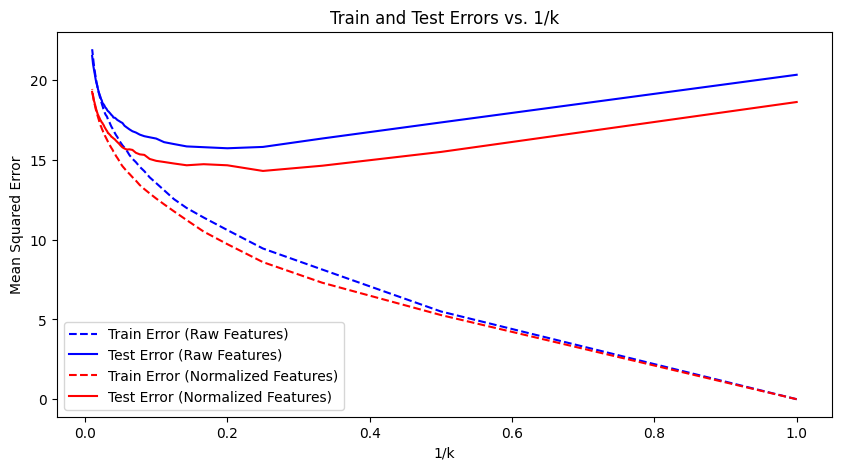

Best value of k (normalized features) on test dataset: 4
Best value of k (raw features) on test dataset: 5


In [12]:
X = df_data.iloc[:, :-1].values
y = df_data.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

k_values = range(1, 101)
train_errors_raw = []
test_errors_raw = []
train_errors_scaled = []
test_errors_scaled = []

for k in k_values:
    knn_raw = KNeighborsRegressor(n_neighbors=k)
    knn_scaled = KNeighborsRegressor(n_neighbors=k)

    knn_raw.fit(X_train, y_train)
    knn_scaled.fit(X_train_scaled, y_train)

    y_train_pred_raw = knn_raw.predict(X_train)
    y_test_pred_raw = knn_raw.predict(X_test)

    y_train_pred_scaled = knn_scaled.predict(X_train_scaled)
    y_test_pred_scaled = knn_scaled.predict(X_test_scaled)

    train_errors_raw.append(mean_squared_error(y_train, y_train_pred_raw))
    test_errors_raw.append(mean_squared_error(y_test, y_test_pred_raw))

    train_errors_scaled.append(mean_squared_error(y_train, y_train_pred_scaled))
    test_errors_scaled.append(mean_squared_error(y_test, y_test_pred_scaled))

plt.figure(figsize=(10, 5))
plt.plot(1 / np.array(k_values), train_errors_raw, label='Train Error (Raw Features)', linestyle="--", color="blue")
plt.plot(1 / np.array(k_values), test_errors_raw, label='Test Error (Raw Features)', linestyle="-", color="blue")
plt.plot(1 / np.array(k_values), train_errors_scaled, label='Train Error (Normalized Features)', linestyle="--", color="red")
plt.plot(1 / np.array(k_values), test_errors_scaled, label='Test Error (Normalized Features)', linestyle="-", color="red")
plt.xlabel('1/k')
plt.ylabel('Mean Squared Error')
plt.title('Train and Test Errors vs. 1/k')
plt.legend()
plt.show()


index_best_scaled = np.argmin(test_errors_scaled)
best_k_scaled = k_values[index_best_scaled]
print("Best value of k (normalized features) on test dataset:", best_k_scaled)

index_best_raw = np.argmin(test_errors_raw)
best_k_raw = k_values[index_best_raw]
print("Best value of k (raw features) on test dataset:", best_k_raw)

### (j ) Compare KNN and Linear

In [13]:
y_test_pred_linear = final_model.predict(X_test_significant)
linear_test_mse = mean_squared_error(y_test, y_test_pred_linear)


best_knn_raw = KNeighborsRegressor(n_neighbors=best_k_raw)
best_knn_scaled = KNeighborsRegressor(n_neighbors=best_k_scaled)

best_knn_raw.fit(X_train, y_train)
best_knn_scaled.fit(X_train_scaled, y_train)

y_test_pred_knn_raw = best_knn_raw.predict(X_test)
y_test_pred_knn_scaled = best_knn_scaled.predict(X_test_scaled)

knn_test_mse_raw = mean_squared_error(y_test, y_test_pred_knn_raw)
knn_test_mse_scaled = mean_squared_error(y_test, y_test_pred_knn_scaled)

print("Test MSE Comparison:")
print(f"Linear Regression: {linear_test_mse:.4f}")
print(f"KNN Regression (Raw Features, k={best_k_raw}): {knn_test_mse_raw:.4f}")
print(f"KNN Regression (Normalized Features, k={best_k_scaled}): {knn_test_mse_scaled:.4f}")

Test MSE Comparison:
Linear Regression: 18.9135
KNN Regression (Raw Features, k=5): 15.7268
KNN Regression (Normalized Features, k=4): 14.3057


## 2. ISLR: 2.4.1

### (a) The sample size n is extremely large, and the number of predictors p is small.

A flexible model is preferable in this scenario. With a large sample size and a small number of predictors, an inflexible model may struggle to capture the underlying patterns, leading to underfitting. Therefore, a more flexible approach is likely to yield better performance.

### (b) The number of predictors p is extremely large, and the number of observations n is small.

A flexible model performs poorly in this case. When the sample size is small and the number of predictors is large, a highly flexible model is prone to overfitting, capturing noise rather than the true pattern. In contrast, a less flexible model is more likely to generalize well and provide better results.

### (c) The relationship between the predictors and response is highly non-linear.

A flexible model is more suitable in this case. An inflexible model may fail to capture the complexity of a highly nonlinear relationship, leading to poor performance. In contrast, a flexible model can better adapt to the variations and accurately represent the underlying pattern.

### (d) The variance of the error terms, i.e. $σ^2$ = Var(ε), is extremely high.

A flexible model is less effective in this case. High variance suggests the presence of noise, and a highly flexible model is likely to overfit by capturing this noise rather than the true pattern. In contrast, an inflexible model provides better generalization and avoids overfitting.

## 3. ISLR: 2.4.7

### (a) Compute the Euclidean distance between each observation and the test point, X1 = X2 = X3 = 0.

In [14]:

points = [[0,3,0], [2,0,0], [0,1,3], [0,1,2], [-1,0,1], [1,1,1]]
labels = ["Red", "Red", "Red", "Green", "Green", "Red"]
test_sample = [[0,0,0]]

# Compute Euclidean distances
dist_values = pairwise_distances(points, test_sample, metric='euclidean')

# Structure data for display
table_data = [[idx+1, points[idx], round(dist_values[idx][0], 2), labels[idx]] for idx in range(len(points))]

# Print table
print(tabulate(table_data, headers=['Index', 'Point', 'Distance to Test Sample', 'Label'], tablefmt='fancy_grid'))


╒═════════╤════════════╤═══════════════════════════╤═════════╕
│   Index │ Point      │   Distance to Test Sample │ Label   │
╞═════════╪════════════╪═══════════════════════════╪═════════╡
│       1 │ [0, 3, 0]  │                      3    │ Red     │
├─────────┼────────────┼───────────────────────────┼─────────┤
│       2 │ [2, 0, 0]  │                      2    │ Red     │
├─────────┼────────────┼───────────────────────────┼─────────┤
│       3 │ [0, 1, 3]  │                      3.16 │ Red     │
├─────────┼────────────┼───────────────────────────┼─────────┤
│       4 │ [0, 1, 2]  │                      2.24 │ Green   │
├─────────┼────────────┼───────────────────────────┼─────────┤
│       5 │ [-1, 0, 1] │                      1.41 │ Green   │
├─────────┼────────────┼───────────────────────────┼─────────┤
│       6 │ [1, 1, 1]  │                      1.73 │ Red     │
╘═════════╧════════════╧═══════════════════════════╧═════════╛


### (b) What is our prediction with K = 1? Why?

With K=1, the closest point is [-1,0,1], which belongs to the Green class. Hence, the test point is classified as Green.

### (c) What is our prediction with K = 3? Why?

With K=3, the three closest points are [2,0,0], [-1,0,1], and [1,1,1], which belong to the Red, Green, and Red classes, respectively. Since the majority class is Red, the test point is classified as Re

### (d) If the Bayes decision boundary in this problem is highly non-linear, then would we expect the best value for K to be large or small? Why?

A small K is preferable because as K increases, the model becomes less flexible, leading to a straighter decision boundary. However, since the true boundary is highly nonlinear, a smaller K is better suited to capturing the complex patterns in the data.